In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:

v = np.array([1, 2, 3]) # 3 x 1 array

m = np.array([[1, 2, 3], [3, 4, 5]]) # 2 x 3 matrix
 
print(v.shape, m.shape)

(3,) (2, 3)


In [3]:
ve = m * v # element-wise multiplication
print('ve = ', ve, ve.shape)

vm = m @ v # matrix multiplication

print('vm = ', vm)

ve =  [[ 1  4  9]
 [ 3  8 15]] (2, 3)
vm =  [14 26]


In [4]:
# matrix multiply by dot produts
v2 = np.matmul(m, v)

print(v2, v2.shape)

[14 26] (2,)


(576, 787, 3)


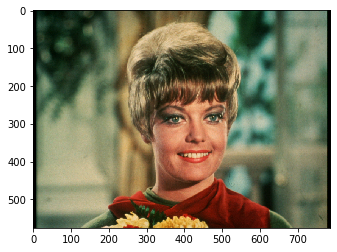

In [5]:
data_dir = '/Users/abhir/cs413/data/'

zelda = plt.imread(data_dir + 'zelda-color.bmp') # rgb

print(zelda.shape)

plt.imshow(zelda)
plt.show()

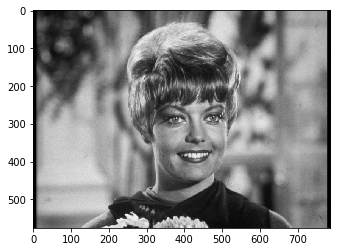

In [6]:

green = zelda[:,:,1] # green channel

plt.imshow(green, 'gray')
plt.show()

In [7]:
# RGB -> Y    luminance =  0.299*R + 0.587*G + 0.114*b

red = zelda[:,:,0]
green = zelda[:,:,1]
blue = zelda[:,:,2]

y = 0.299 * red + 0.587*green + 0.114*blue

print(y.shape, y.dtype)


(576, 787) float64


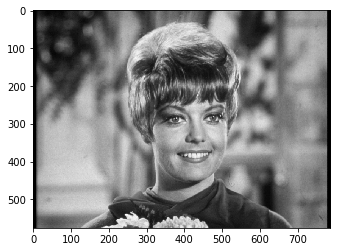

In [8]:
# show luminance

plt.imshow(y.astype('uint8'), 'gray')
plt.show()

In [9]:
# linear mapping using matrix multiplication

rgb2y = np.array([0.299, 0.587, 0.114])

print(rgb2y, rgb2y.shape)

# project RGB -> Y
y2 = np.matmul(zelda, rgb2y)

print(y2.shape) # should be 'scalar' field

[0.299 0.587 0.114] (3,)
(576, 787)


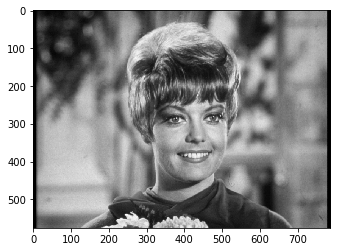

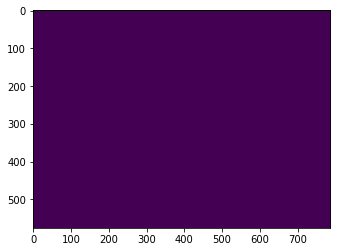

mse =  0.0


In [10]:
# show luminance

plt.imshow(y2.astype('uint8'), 'gray')
plt.show()

# confirm difference

error2 = np.square( y - y2 ) # squared error between y and y2

plt.imshow(error2), plt.show()

print('mse = ', np.mean(error2))


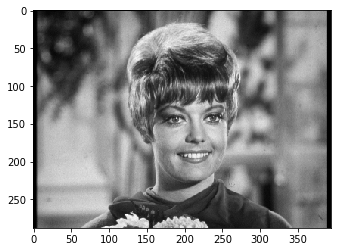

(288, 394)


In [11]:

# subsampling by a factor of 2

half = y[::2,::2] # subsample

plt.imshow(half, 'gray'), plt.show()
print(half.shape)

In [12]:
# concept of broadcasting

z = np.zeros((6,6))
print(z)

z[:,:] = 2
print(z)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]]


In [13]:
# broadcasting with loops

z2 = np.empty_like(z)
k = 1
for i in range(z.shape[0]//2):
    for j in range(z.shape[1]//2):
        
        # broadcast into 2x2 regions of output
        z2[2*i:2*i+2,2*j:2*j+2] = k
        
        k += 1
        
print(z2)

[[1. 1. 2. 2. 3. 3.]
 [1. 1. 2. 2. 3. 3.]
 [4. 4. 5. 5. 6. 6.]
 [4. 4. 5. 5. 6. 6.]
 [7. 7. 8. 8. 9. 9.]
 [7. 7. 8. 8. 9. 9.]]


In [14]:
# upsampling?

full = zelda[:,:,0] # green channel

# first subsample
half = full[::2,::2] # subsample x 2

quarter = half[::2,::2] # subsample x 4

eigth = quarter[::2,::2] # subsample x 8



# use for loops
output = np.empty_like(full)

size = 8
for i in range(0,output.shape[0],size) : # step in size
    for j in range(0,output.shape[1],size) : # step in size

        output[i:i+size,j:j+size] = eigth[i//size,j//size] # broad cast values
    
plt.imshow(output, 'gray')
plt.show()